In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import gamma

## Стиль

In [2]:
STYLE = {
    "main": "black",
    "hist": "#dddddd",
    "theory": "red",
    "ref": "blue",
}

LW_MAIN = 1.2
LW_THEORY = 2.0
LW_REF = 1.5

GRID_ALPHA = 0.3

## Легенда

In [3]:
def place_legend_outside(ax):

    ax.legend(
        loc="upper left",
        bbox_to_anchor=(1.02, 1),
        borderaxespad=0,
        frameon=True
    )

    plt.tight_layout(rect=[0, 0, 0.8, 1])

## Выборка

In [4]:
np.random.seed(2026)

n = 25

# генерация выборки из Exp(1)
x = np.random.exponential(scale=1.0, size=n)

# вариационный ряд
xs = np.sort(x)

xmin = xs[0]
xmax = xs[-1]

print("Вариационный ряд:")
print(xs)

Вариационный ряд:
[0.0310708  0.04937419 0.09310154 0.12943174 0.22082261 0.24762278
 0.26384364 0.26910058 0.3509305  0.3602192  0.45210812 0.50633737
 0.53275045 0.58890905 0.65256174 0.81701143 0.82529414 1.02973088
 1.18578285 1.52891594 2.24515107 2.42718712 2.56874161 3.75653657
 4.38607435]


### теоретические харакитеристики

In [5]:
# теоретическая мода Exp(1)
Mo = 0

# размах выборки
R = xmax - xmin

# теоретическая медиана Exp(1)
true_median = math.log(2)

print("\nТеоретическая мода =", Mo)
print("Размах выборки =", R)
print("Теоретическая медиана =", true_median)


Теоретическая мода = 0
Размах выборки = 4.355003550354952
Теоретическая медиана = 0.6931471805599453


### Квартили

In [6]:
def quartiles_mvm(s):

    n = len(s)

    mid = n // 2

    Q2 = s[mid]

    lower = s[:mid+1]
    upper = s[mid:]

    Q1 = lower[len(lower)//2]
    Q3 = upper[len(upper)//2]

    return Q1, Q2, Q3


Q1, Q2, Q3 = quartiles_mvm(xs)

IQR = Q3 - Q1

L = Q1 - 1.5*IQR
U = Q3 + 1.5*IQR

print("\nПервый квартиль Q1 =", Q1)
print("Медиана =", Q2)
print("Третий квартиль Q3 =", Q3)

print("Нижняя граница L =", L)
print("Верхняя граница U =", U)


Первый квартиль Q1 = 0.26384363905443914
Медиана = 0.5327504540365046
Третий квартиль Q3 = 1.1857828490698699
Нижняя граница L = -1.1190651759687067
Верхняя граница U = 2.5686916640930155


### Эмпирическая функция распределения

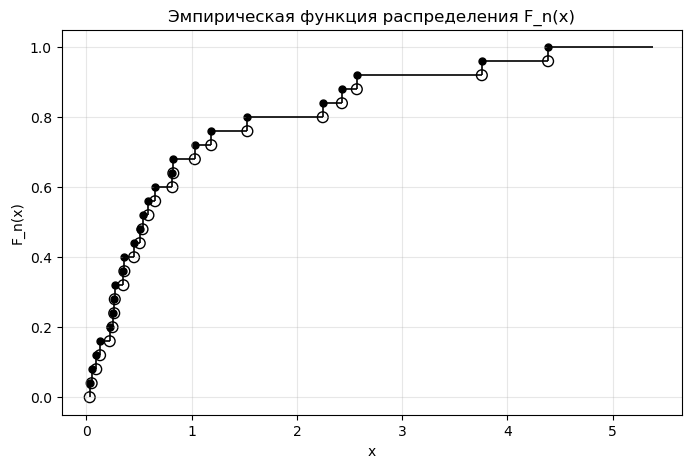

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("Эмпирическая функция распределения F_n(x)")
ax.set_xlabel("x")
ax.set_ylabel("F_n(x)")

for i in range(1, n):

    ax.hlines(
        i/n,
        xs[i-1],
        xs[i],
        color=STYLE["main"],
        linewidth=LW_MAIN
    )

ax.hlines(
    1,
    xs[-1],
    xs[-1]+1,
    color=STYLE["main"],
    linewidth=LW_MAIN
)

for i in range(1, n+1):

    xi = xs[i-1]

    y1 = (i-1)/n
    y2 = i/n

    ax.vlines(
        xi,
        y1,
        y2,
        color=STYLE["main"],
        linewidth=LW_MAIN
    )

    ax.scatter(
        xi,
        y1,
        facecolors="none",
        edgecolors=STYLE["main"],
        s=60
    )

    ax.scatter(
        xi,
        y2,
        color=STYLE["main"],
        s=25
    )

ax.grid(alpha=GRID_ALPHA)

plt.show()

### Гистограмма по формуле Стерджеса

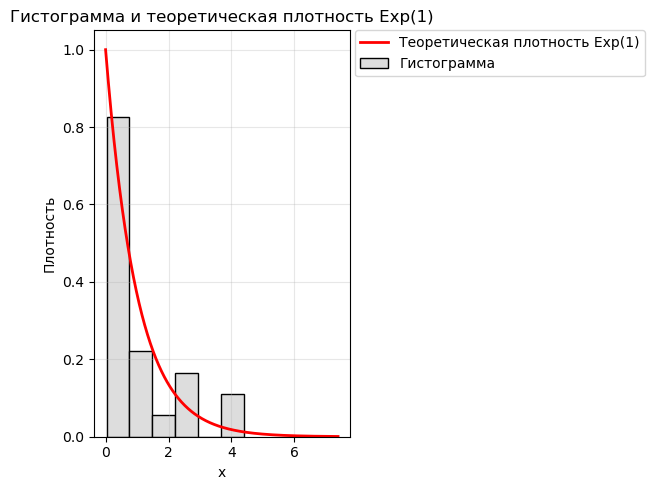

In [8]:
k = math.ceil(1 + math.log2(n))

edges = np.linspace(xmin, xmax, k+1)

counts, _ = np.histogram(xs, bins=edges)

h = edges[1] - edges[0]

heights = counts/(n*h)

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("Гистограмма и теоретическая плотность Exp(1)")
ax.set_xlabel("x")
ax.set_ylabel("Плотность")

ax.bar(
    edges[:-1],
    heights,
    width=h,
    align="edge",
    color=STYLE["hist"],
    edgecolor=STYLE["main"],
    label="Гистограмма"
)

grid = np.linspace(0, xmax+3, 500)

ax.plot(
    grid,
    np.exp(-grid),
    color=STYLE["theory"],
    linewidth=LW_THEORY,
    label="Теоретическая плотность Exp(1)"
)

ax.grid(alpha=GRID_ALPHA)

place_legend_outside(ax)

plt.show()

### boxplot

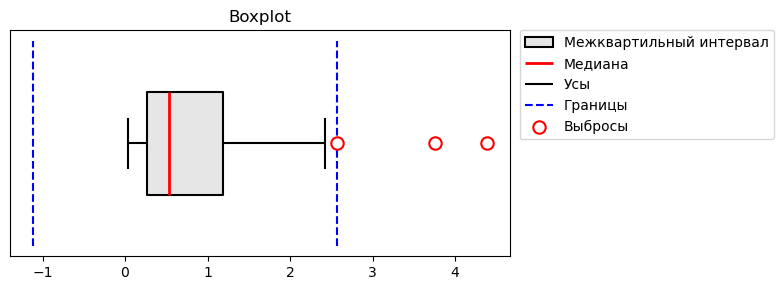

In [9]:
def plot_boxplot(sample):

    x = np.sort(sample)

    Q1, Q2, Q3 = quartiles_mvm(x)

    IQR = Q3 - Q1

    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR

    # значения без выбросов
    non_out = x[(x >= L) & (x <= U)]

    lower_whisker = non_out.min()
    upper_whisker = non_out.max()

    outliers = x[(x < L) | (x > U)]

    fig, ax = plt.subplots(figsize=(10, 3))

    y = 0
    h = 0.5


    ax.fill_between(
        [Q1, Q3],
        y-h/2,
        y+h/2,
        facecolor="#e6e6e6",
        edgecolor="black",
        linewidth=1.5,
        label="Межквартильный интервал"
    )


    ax.vlines(
        Q2,
        y-h/2,
        y+h/2,
        color="red",
        linewidth=2,
        label="Медиана"
    )


    ax.hlines(
        y,
        lower_whisker,
        Q1,
        color="black",
        linewidth=1.5,
        label="Усы"
    )

    ax.hlines(
        y,
        Q3,
        upper_whisker,
        color="black",
        linewidth=1.5
    )


    cap = h*0.25

    ax.vlines(
        lower_whisker,
        y-cap,
        y+cap,
        color="black",
        linewidth=1.5
    )

    ax.vlines(
        upper_whisker,
        y-cap,
        y+cap,
        color="black",
        linewidth=1.5
    )


    ax.vlines(
        L,
        y-h,
        y+h,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        label="Границы"
    )

    ax.vlines(
        U,
        y-h,
        y+h,
        color="blue",
        linestyle="--",
        linewidth=1.5
    )


    if len(outliers) > 0:

        ax.scatter(
            outliers,
            np.zeros_like(outliers),
            edgecolor="red",
            facecolor="white",
            s=80,
            linewidth=1.5,
            label="Выбросы",
            zorder=5
        )


    ax.set_title("Boxplot")
    ax.set_yticks([])

    place_legend_outside(ax)

    plt.show()


plot_boxplot(xs)

## (b)

По гистограмме видно, что максимум около нуля и дальше значения убывают вправо.

Boxplot показывает правостороннюю асимметрию и несколько выбросов справа.

### BOOTSTRAP среднего + ЦПТ + Гамма-плотность

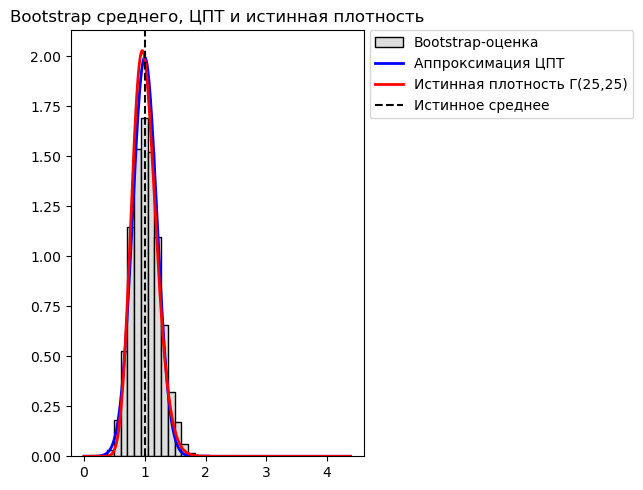

In [10]:
B = 10000

rng = np.random.default_rng(2026)

boot = xs[rng.integers(0, n, size=(B, n))]

boot_mean = boot.mean(axis=1)

mu = 1
sigma = 1/math.sqrt(n)

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    boot_mean,
    bins=math.ceil(1+math.log2(B)),
    density=True,
    color=STYLE["hist"],
    edgecolor=STYLE["main"],
    label="Bootstrap-оценка"
)

grid = np.linspace(0, xmax, 500)

ax.plot(
    grid,
    1/(sigma*np.sqrt(2*np.pi))*np.exp(-(grid-mu)**2/(2*sigma**2)),
    color="blue",
    linewidth=LW_THEORY,
    label="Аппроксимация ЦПТ"
)

ax.plot(
    grid,
    (n**n/gamma(n))*(grid**(n-1))*np.exp(-n*grid),
    color="red",
    linewidth=LW_THEORY,
    label="Истинная плотность Γ(25,25)"
)

ax.axvline(mu, color="black", linestyle="--", label="Истинное среднее")

ax.set_title("Bootstrap среднего, ЦПТ и истинная плотность")

place_legend_outside(ax)

plt.show()

## (c)

Bootstrap-распределение среднего хорошо совпадает с истинным распределением.

Нормальное приближение по ЦПТ тоже достаточно точное.

Это значит, что bootstrap и ЦПТ корректно описывают распределение среднего.

---

BOOTSTRAP медианы

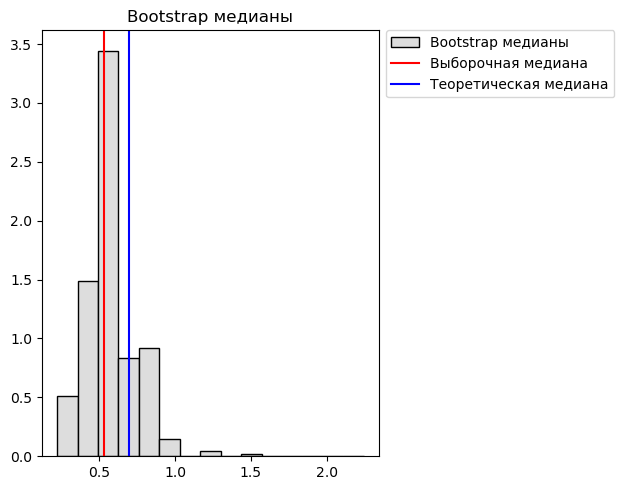

In [11]:
boot_med = np.median(boot, axis=1)

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    boot_med,
    bins=math.ceil(1+math.log2(B)),
    density=True,
    color=STYLE["hist"],
    edgecolor=STYLE["main"],
    label="Bootstrap медианы"
)

ax.axvline(Q2, color="red", label="Выборочная медиана")
ax.axvline(true_median, color="blue", label="Теоретическая медиана")

ax.set_title("Bootstrap медианы")

place_legend_outside(ax)

plt.show()

## (e)

Bootstrap-распределение медианы находится около выборочной медианы.

Теоретическая медиана также лежит внутри bootstrap-распределения.

Значит, bootstrap даёт хорошую оценку медианы.

---

### BOOTSTRAP коэффициента ассиметрии

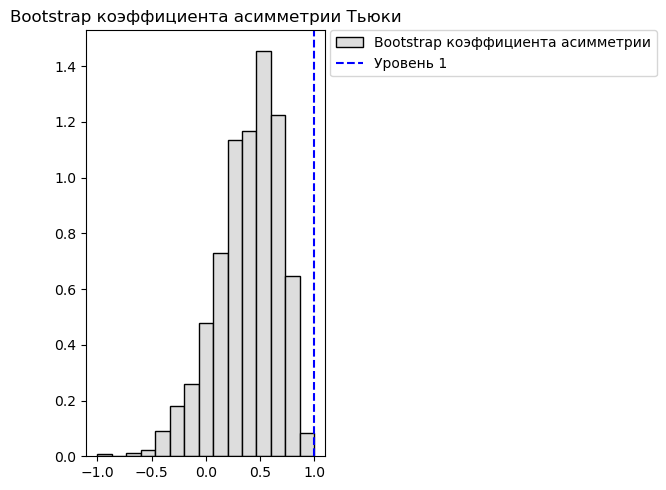


Вероятность P(A_T < 1) = 1.0


In [13]:
def skew(sample):

    s = np.sort(sample)

    q1, q2, q3 = quartiles_mvm(s)

    return (q1+q3-2*q2)/(q3-q1)


boot_AT = np.apply_along_axis(skew, 1, boot)

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    boot_AT,
    bins=math.ceil(1+math.log2(B)),
    density=True,
    color=STYLE["hist"],
    edgecolor=STYLE["main"],
    label="Bootstrap коэффициента асимметрии"
)

ax.axvline(
    1,
    color="blue",
    linestyle="--",
    label="Уровень 1"
)

ax.set_title("Bootstrap коэффициента асимметрии Тьюки")

place_legend_outside(ax)

plt.show()

print("\nВероятность P(A_T < 1) =", np.mean(boot_AT < 1))

## (d)

Bootstrap-распределение коэффициента асимметрии находится левее уровня 1.

Получилось, что вероятность того, что коэффициент асимметрии меньше 1, равна 1.

Это подтверждает правостороннюю асимметрию распределения.

